In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from VirusHostNetworkAnalysis.prediction_matrix import PredictionMatrix
from VirusHostNetworkAnalysis.null_model import ER
from VirusHostNetworkAnalysis.null_model import CM
from VirusHostNetworkAnalysis.visualize import Graph
from VirusHostNetworkAnalysis.prediction_matrix import Calculations

In [3]:
myco = PredictionMatrix('Sample_Input/myco_predictions_genomad_a2vs.tsv')
myco.make_rectangular_matrix('prediction')


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [ ]:
myco.plot_heatmap('prediction')

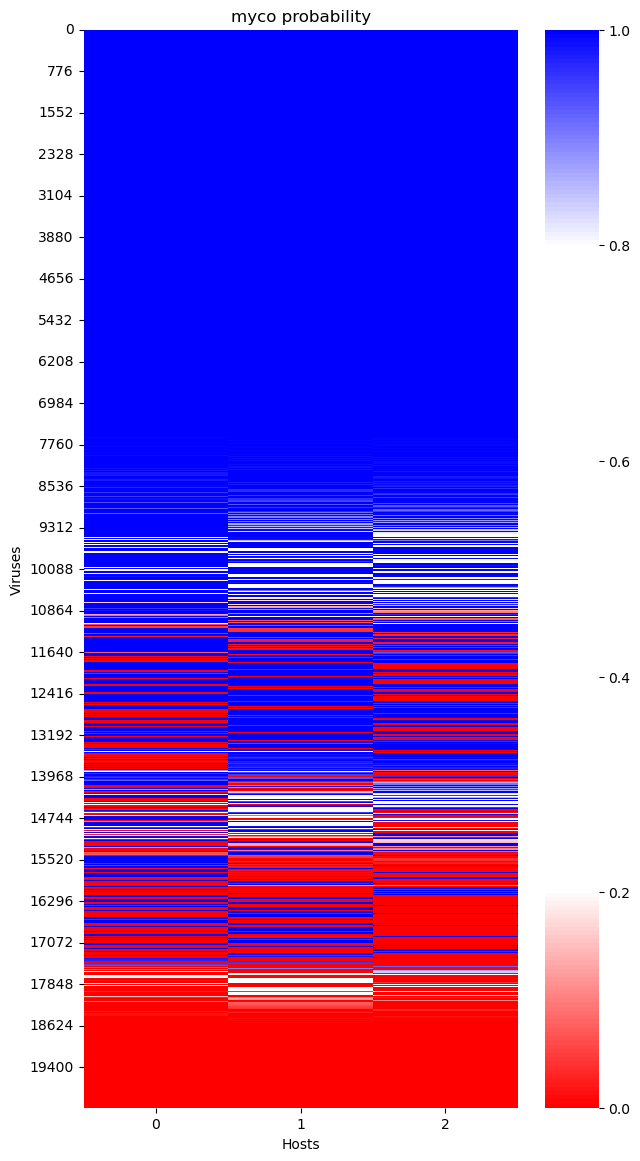

In [6]:
myco.make_rectangular_matrix('probability')
myco.plot_heatmap('probability')

In [ ]:
myco_er = ER(len(myco.unique_viruses), len(myco.unique_hosts), 0.5)
myco_er.fill_ER_graph()
myco_er.create_edge_list()

myco_er_graph = Graph(myco_er.matrix_rand, myco.unique_viruses, myco.unique_hosts)
myco_er_graph.degree_distribution(myco_er.calculate_degree())

In [ ]:
myco_cm = CM(myco.virus_host_array)
#myco_cm.bootstrap_stats(1000)

myco_cm_graph = Graph(myco_cm.matrix_vhip, myco.unique_viruses, myco.unique_hosts)
myco_cm_graph.degree_distribution(myco_cm.iterations(10000, 1))

In [ ]:
cal = Calculations(myco.virus_host_array, False)
cal.nestedness()


### 100 by 2000 subset code is below

In [ ]:
### Large subset 100 x 2000
filtered = PredictionMatrix('Sample_Input/filtered_network.tsv')
filtered.make_rectangular_matrix('prediction')
filtered.plot_heatmap('prediction')
filtered.make_rectangular_matrix('probability')
filtered.plot_heatmap('probability')

In [ ]:
filtered_plot = Graph(filtered.virus_host_array, filtered.rows, filtered.columns)
filtered_plot.initialize_graph()
filtered_plot.calculate_centrality(2000)
filtered_plot.plot_eigenvectors()

In [ ]:
filtered = PredictionMatrix('Sample_Input/filtered_network.tsv')
filtered.make_rectangular_matrix('prediction')

In [ ]:
cal = Calculations(filtered.virus_host_array, True)
nodf = cal.run_parallel(4)

In [ ]:
print(nodf)